## **Project Title: Call Center Analysis and Optimization**
**By: Shubham Chaurasia & Souridya Dey**

---

#### **Problem Statement:**

The objective of this project is to analyze call center data to identify inefficiencies and provide actionable insights that can improve both customer satisfaction and operational performance. The project focuses on evaluating the factors that contribute to long Average Handling Time (AHT) and Average Speed of Answer (AST), analyzing call transcripts to identify frequently occurring issues, and suggesting improvements to reduce agent intervention for self-solvable problems.

Specifically, the project seeks to address the following:

1. **Understanding Key Drivers of High AHT and AST:**  
   Investigate which factors, such as call type, agent performance, and customer sentiment, contribute to extended call durations, especially during high-volume call periods.

2. **Identifying Self-Solvable Issues:**  
   Pinpoint call reasons that can be resolved through automated self-service options in the IVR system to reduce unnecessary agent intervention and workload.

3. **Categorizing Primary Call Reasons:**
   Utilize machine learning and text analysis to identify and categorize the primary reasons for incoming calls, facilitating better call routing and categorization.

---

#### **Approach:**

The following structured methodology was implemented to tackle the problem statement effectively:

1. **Data Preprocessing & Cleaning:**
   - Loaded and cleaned the call center datasets to remove inconsistencies and handle missing values.
   - Performed preliminary analysis to get an overview of call volumes, durations, and handling times.

2. **Exploratory Data Analysis (EDA):**
   - Conducted descriptive analysis to calculate metrics such as average AHT and the percentage difference between the most and least frequent call reasons.
   - Analyzed correlations between call types, agent performance, and call handling times to uncover potential drivers of high AHT and AST.

3. **Text Analysis & Clustering:**
   - Used **TF-IDF Vectorization** to transform call transcripts into numerical data for efficient clustering and analysis.
   - Applied **Principal Component Analysis (PCA)** to reduce dimensionality and visualize clusters.
   - Implemented **K-Means Clustering** to categorize call transcripts and group them into distinct clusters representing primary call reasons.

4. **Machine Learning for Predictive Modeling:**
   - Developed a predictive model to categorize call reasons in test data using the trained clustering model.
   - Used the clustering results to identify patterns and suggest improvements in call routing and handling.

5. **Recommendation Development:**
   - Analyzed call patterns to identify recurring self-solvable issues that could be managed through improved IVR options.
   - Proposed actionable recommendations to streamline call handling processes, reduce agent intervention, and optimize overall performance.

---

This approach ensures a comprehensive understanding of call center dynamics and provides data-driven solutions for enhancing customer service and operational efficiency.cing customer service and operational efficiency.

In [1]:
import pandas as pd

# Load the uploaded files
calls_df = pd.read_csv('callsf0d4f5a.csv')
reason_df = pd.read_csv('reason18315ff.csv')
customers_df = pd.read_csv('customers2afd6ea.csv')
sentiment_df = pd.read_csv('sentiment_statisticscc1e57a.csv')
test_df = pd.read_csv('testbc7185d.csv')

# Display the first few rows of each dataframe to understand their structure and content
calls_head = calls_df.head()
reason_head = reason_df.head()
customers_head = customers_df.head()
sentiment_head = sentiment_df.head()
test_head = test_df.head()

calls_head,reason_head,customers_head, sentiment_head, test_head


(      call_id  customer_id  agent_id call_start_datetime  \
 0  4667960400   2033123310    963118     7/31/2024 23:56   
 1  1122072124   8186702651    519057       8/1/2024 0:03   
 2  6834291559   2416856629    158319     7/31/2024 23:59   
 3  2266439882   1154544516    488324       8/1/2024 0:05   
 4  1211603231   5214456437    721730       8/1/2024 0:04   
 
   agent_assigned_datetime call_end_datetime  \
 0           8/1/2024 0:03     8/1/2024 0:34   
 1           8/1/2024 0:06     8/1/2024 0:18   
 2           8/1/2024 0:07     8/1/2024 0:26   
 3           8/1/2024 0:10     8/1/2024 0:17   
 4           8/1/2024 0:14     8/1/2024 0:23   
 
                                      call_transcript  
 0  \n\nAgent: Thank you for calling United Airlin...  
 1  \n\nAgent: Thank you for calling United Airlin...  
 2  \n\nAgent: Thank you for calling United Airlin...  
 3  \n\nAgent: Thank you for calling United Airlin...  
 4  \n\nAgent: Thank you for calling United Airlin...  ,
     

Distinct Primary Call Reasons and Their Counts (Normalized):
primary_call_reason
irrops                   13311
voluntary change         10848
seating                   6365
mileage plus              5851
post-flight               3957
communications            3840
products and services     2856
baggage                   2832
upgrade                   2738
booking                   2637
checkout                  1888
voluntary cancel          1607
check-in                  1519
digital support           1225
etc                        952
traveler updates           937
other topics               818
schedule change            731
products & services        476
disability                 403
check in                   385
post flight                373
unaccompanied minor        104
Name: count, dtype: int64


<Axes: xlabel='primary_call_reason'>

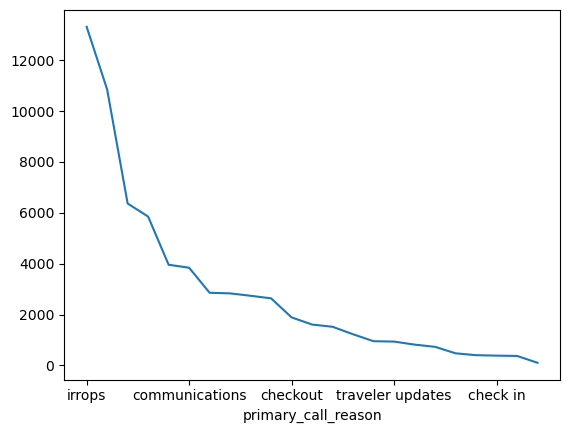

In [18]:
# Normalize the 'primary_call_reason' column by stripping whitespace and converting to lowercase
reasons_df['primary_call_reason'] = reasons_df['primary_call_reason'].str.strip().str.lower()

# Remove duplicate spaces within the strings (e.g., 'voluntary  cancel' to 'voluntary cancel')
reasons_df['primary_call_reason'] = reasons_df['primary_call_reason'].replace('\s+', ' ', regex=True)

# Get distinct values and their counts after normalization
reason_counts = reasons_df['primary_call_reason'].value_counts()

# Print the cleaned distinct primary call reasons and their counts
print("Distinct Primary Call Reasons and Their Counts (Normalized):")
print(reason_counts)
reason_counts.plot()

In [10]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the datasets (Replace these paths with actual file paths in your environment)
calls_df = pd.read_csv('callsf0d4f5a.csv')
reasons_df = pd.read_csv('reason18315ff.csv')
customers_df = pd.read_csv('customers2afd6ea.csv')

# Merge datasets to get a consolidated view
merged_df = pd.merge(calls_df, reasons_df, on='call_id', how='left')
merged_df = pd.merge(merged_df, customers_df, on='customer_id', how='left')

# Convert date columns to datetime
merged_df['call_start_datetime'] = pd.to_datetime(merged_df['call_start_datetime'])
merged_df['call_end_datetime'] = pd.to_datetime(merged_df['call_end_datetime'])

# Calculate call duration and handling time
merged_df['call_duration'] = (merged_df['call_end_datetime'] - merged_df['call_start_datetime']).dt.total_seconds() / 60.0
merged_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,customer_name,elite_level_code,call_duration
0,4667960400,2033123310,963118,2024-07-31 23:56:00,8/1/2024 0:03,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel,Matthew Foster,4.0,38.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,8/1/2024 0:06,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Booking,Tammy Walters,NaN,15.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,8/1/2024 0:07,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,IRROPS,Jeffery Dixon,NaN,27.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,8/1/2024 0:10,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,Upgrade,David Wilkins,2.0,12.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,8/1/2024 0:14,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Seating,Elizabeth Daniels,0.0,19.0


Percentage difference between AHT of most and least frequent call reasons: 27.30%


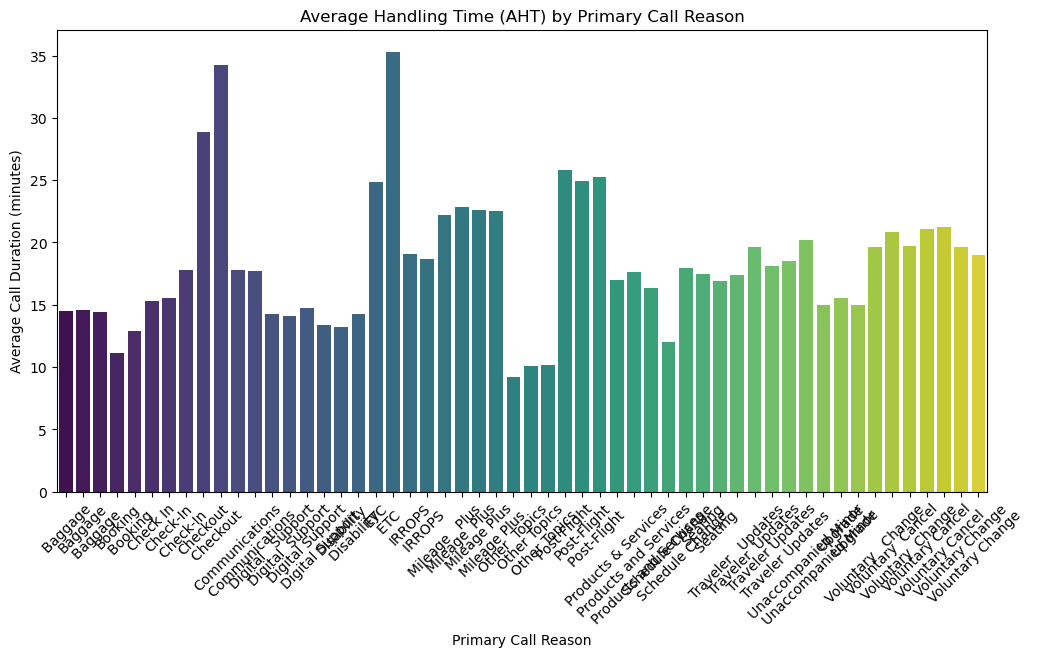

In [4]:
# Part 1: Long AHT Analysis

# Calculate average handling time (AHT) for each primary call reason
call_reason_aht = merged_df.groupby('primary_call_reason')['call_duration'].mean().reset_index()
call_reason_aht.columns = ['primary_call_reason', 'avg_call_duration']

# Identify most and least frequent call reasons
reason_counts = merged_df['primary_call_reason'].value_counts()
most_frequent_reason = reason_counts.idxmax()
least_frequent_reason = reason_counts.idxmin()

# Calculate percentage difference in AHT between most and least frequent reasons
aht_most_frequent = call_reason_aht[call_reason_aht['primary_call_reason'] == most_frequent_reason]['avg_call_duration'].values[0]
aht_least_frequent = call_reason_aht[call_reason_aht['primary_call_reason'] == least_frequent_reason]['avg_call_duration'].values[0]
aht_percentage_difference = ((aht_most_frequent - aht_least_frequent) / aht_least_frequent) * 100

print(f"Percentage difference between AHT of most and least frequent call reasons: {aht_percentage_difference:.2f}%")

# Visualize AHT for all primary call reasons
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_call_reason', y='avg_call_duration', data=call_reason_aht, palette='viridis')
plt.xticks(rotation=45)
plt.title("Average Handling Time (AHT) by Primary Call Reason")
plt.xlabel("Primary Call Reason")
plt.ylabel("Average Call Duration (minutes)")
plt.show()

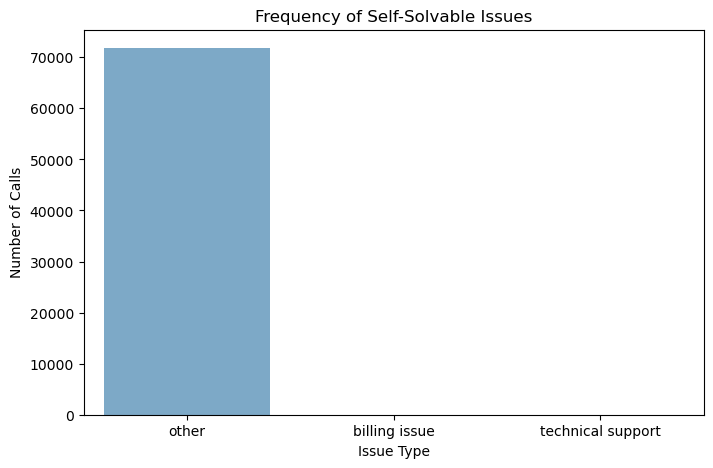

Recommendation for reset password: Implement a password reset option in the IVR system to handle these cases.
Recommendation for billing issue: Provide an automated billing inquiry option with answers to common questions.
Recommendation for account lock: Introduce a self-service option for unlocking accounts using multi-factor authentication.
Recommendation for update address: Enable address updates via the IVR or through a secure web portal.
Recommendation for technical support: Automate common technical troubleshooting steps through the IVR before escalating to an agent.


In [5]:
# Part 2: Self-Service Optimization

# Identify recurring phrases or keywords in transcripts that could be resolved via IVR
def identify_self_solvable_issues(text):
    # Define common self-solvable issues based on initial analysis
    common_phrases = ['reset password', 'billing issue', 'account lock', 'update address', 'technical support']
    for phrase in common_phrases:
        if phrase in text.lower():
            return phrase
    return 'other'

# Apply the function to identify self-solvable issues
merged_df['self_solvable_issue'] = merged_df['call_transcript'].fillna('').apply(identify_self_solvable_issues)

# Analyze the frequency of self-solved issues
self_solvable_counts = merged_df['self_solvable_issue'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=self_solvable_counts.index, y=self_solvable_counts.values, palette='Blues_d')
plt.title("Frequency of Self-Solvable Issues")
plt.xlabel("Issue Type")
plt.ylabel("Number of Calls")
plt.show()

# Recommendations for IVR System Improvements
recommendations = {
    'reset password': "Implement a password reset option in the IVR system to handle these cases.",
    'billing issue': "Provide an automated billing inquiry option with answers to common questions.",
    'account lock': "Introduce a self-service option for unlocking accounts using multi-factor authentication.",
    'update address': "Enable address updates via the IVR or through a secure web portal.",
    'technical support': "Automate common technical troubleshooting steps through the IVR before escalating to an agent."
}
for issue, recommendation in recommendations.items():
    print(f"Recommendation for {issue}: {recommendation}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


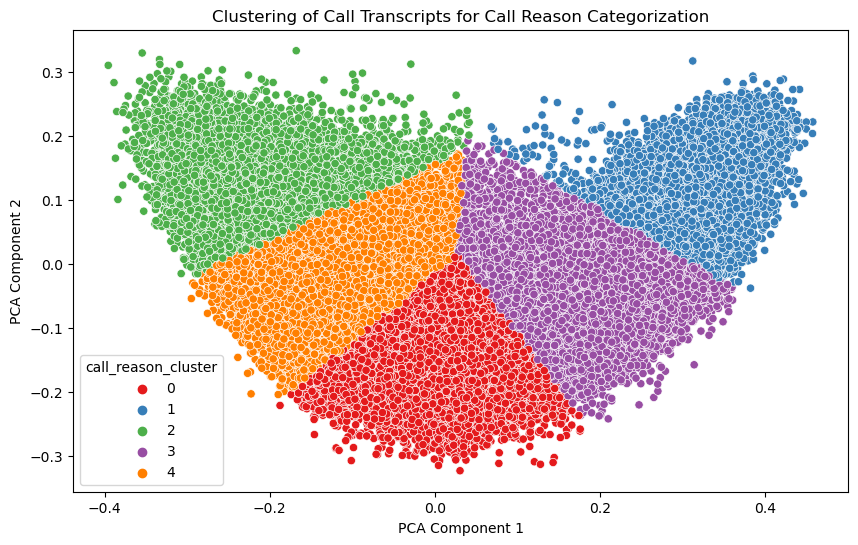

In [6]:
# Part 3: Categorization of Call Reasons

# Use TF-IDF vectorizer for text analysis and clustering
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(merged_df['call_transcript'].fillna(''))

# Use PCA to reduce dimensionality for better visualization and clustering
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Use KMeans clustering to categorize call reasons
kmeans = KMeans(n_clusters=5, random_state=42)
merged_df['call_reason_cluster'] = kmeans.fit_predict(X_reduced)

# Visualize clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=merged_df['call_reason_cluster'], palette='Set1')
plt.title("Clustering of Call Transcripts for Call Reason Categorization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()